# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Booked a very special holiday ...
1,"Not Verified | Just returned from Chicago, fle..."
2,✅ Trip Verified | BA standards continue to de...
3,Not Verified | Awful. Business class check in...
4,✅ Trip Verified | Not a reliable airline. You...


In [ ]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
df1 = pd.read_csv("BA_reviews.csv")

In [ ]:
df1.head()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   reviews     1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
df1['id'] =	df1['Unnamed: 0']

In [ ]:
df1[['status', 'comment']] = df1['reviews'].str.split("|", expand=True)

In [ ]:
df1.dropna(axis = 1)

,Unnamed: 0,reviews,id,status,comment
0,0,Not Verified | Booked a very special holiday ...,0,Not Verified,Booked a very special holiday for me and my ...
1,1,"Not Verified | Just returned from Chicago, fle...",1,Not Verified,"Just returned from Chicago, flew out 10 days ..."
2,2,✅ Trip Verified | BA standards continue to de...,2,✅ Trip Verified,BA standards continue to decline every time ...
3,3,Not Verified | Awful. Business class check in...,3,Not Verified,Awful. Business class check in queue just as...
4,4,✅ Trip Verified | Not a reliable airline. You...,4,✅ Trip Verified,Not a reliable airline. You cannot trust the...
...,...,...,...,...,...
995,995,✅ Trip Verified | Gatwick to Barbados. First ...,995,✅ Trip Verified,Gatwick to Barbados. First class was third r...
996,996,✅ Trip Verified | Cape Town to London. Very u...,996,✅ Trip Verified,Cape Town to London. Very unimpressive ameni...
997,997,✅ Trip Verified | Bucharest to London. They a...,997,✅ Trip Verified,Bucharest to London. They are not giving fre...
998,998,✅ Trip Verified | Kuala Lumpur to Mexico City ...,998,✅ Trip Verified,Kuala Lumpur to Mexico City via London. The j...


In [ ]:
df1['reviews']
word_to_search = 'British'
filter_df1_british = df1[df1['comment'].str.contains(word_to_search, case = False)]

In [ ]:
filter_df1_british['comment']

0        Booked a very special holiday for me and my ...
2        BA standards continue to decline every time ...
3        Awful. Business class check in queue just as...
5        I take comfort in reading the last ten or so...
10      I had a flight from Miami, Florida to Dublin,...
                             ...                        
972      Boston to London. World Traveler seats. Nice...
973      London to Athens. We were fortunate to get e...
974      London to Johannesburg. So impressed by the ...
976      London to Berlin scheduled for 21st December...
980     I had flown British Airways from Leeds Bradfo...
Name: comment, Length: 286, dtype: object

In [ ]:
filter_df1_british

,Unnamed: 0,reviews,id,status,comment
0,0,Not Verified | Booked a very special holiday ...,0,Not Verified,Booked a very special holiday for me and my ...
2,2,✅ Trip Verified | BA standards continue to de...,2,✅ Trip Verified,BA standards continue to decline every time ...
3,3,Not Verified | Awful. Business class check in...,3,Not Verified,Awful. Business class check in queue just as...
5,5,✅ Trip Verified | I take comfort in reading t...,5,✅ Trip Verified,I take comfort in reading the last ten or so...
10,10,"✅ Trip Verified | I had a flight from Miami, F...",10,✅ Trip Verified,"I had a flight from Miami, Florida to Dublin,..."
...,...,...,...,...,...
972,972,✅ Trip Verified | Boston to London. World Tra...,972,✅ Trip Verified,Boston to London. World Traveler seats. Nice...
973,973,✅ Trip Verified | London to Athens. We were f...,973,✅ Trip Verified,London to Athens. We were fortunate to get e...
974,974,✅ Trip Verified | London to Johannesburg. So ...,974,✅ Trip Verified,London to Johannesburg. So impressed by the ...
976,976,✅ Trip Verified | London to Berlin scheduled ...,976,✅ Trip Verified,London to Berlin scheduled for 21st December...


In [ ]:
bad1_filter_df1_british = filter_df1_british[filter_df1_british['comment'].str.contains("disappointed", case=False)]
bad2_filter_df1_british =  filter_df1_british[filter_df1_british['comment'].str.contains('incredibly disappointed', case=False)]
bad3_filter_df1_british =  filter_df1_british[filter_df1_british['comment'].str.contains('awful', case=False)]
bad4_filter_df1_british =  filter_df1_british[filter_df1_british['comment'].str.contains('terrible', case=False)]

bad_comment_british = pd.concat([bad1_filter_df1_british, bad2_filter_df1_british, bad3_filter_df1_british, bad4_filter_df1_british], axis = 0)

In [ ]:
select_colmun = ['id', 'status','comment']
df_bad_new = bad_comment_british[select_colmun]

In [ ]:
df_bad_new.count()

id         47
status     47
comment    47
dtype: int64

In [ ]:
verified_status_BadNew = df_bad_new[df_bad_new['status'].str.contains('Trip Verified', case = False)]
verified_status_BadNew

,id,status,comment
447,447,✅ Trip Verified,Extremely disappointed In trip experience. I...
495,495,✅ Trip Verified,Me and my 1 year 11 months baby girl flew bu...
542,542,✅ Trip Verified,I booked a trip to Spain for mid-March 2020 ...
615,615,✅ Trip Verified,Gatwick to Tirana. I was incredibly disappoi...
675,675,✅ Trip Verified,London to Belfast. British Airways bullied my...
795,795,✅ Trip Verified,Seems like no one was aware of my existence o...
858,858,✅ Trip Verified,I paid an extra £500 for two Premium economy...
615,615,✅ Trip Verified,Gatwick to Tirana. I was incredibly disappoi...
5,5,✅ Trip Verified,I take comfort in reading the last ten or so...
10,10,✅ Trip Verified,"I had a flight from Miami, Florida to Dublin,..."


In [ ]:
not_verified_status_BadNew = df_bad_new[df_bad_new['status'].str.contains('Not Verified', case = False)]
not_verified_status_BadNew

,id,status,comment
131,131,Not Verified,I travelled with British Airways from Sweden ...
544,544,Not Verified,I booked my honeymoon flight from San Diego ...
775,775,Not Verified,London to Faro. We booked our tickets (famil...
3,3,Not Verified,Awful. Business class check in queue just as...
636,636,Not Verified,Frankfurt to London with British Airways. Aw...
321,321,Not Verified,Terrible experience with British Airways! I ...
697,697,Not Verified,Terrible lack of any leg and body room in ec...
751,751,Not Verified,I have often flown British Airways and have ...


In [ ]:
#Number of Verified and not_verified status
numberOf_verified = verified_status_BadNew['status'].value_counts()
numberOf_not_verified = not_verified_status_BadNew['status'].value_counts()

#print them
print(numberOf_verified)
print(numberOf_not_verified)

status
✅ Trip Verified     39
Name: count, dtype: int64
status
Not Verified     8
Name: count, dtype: int64


In [ ]:
#The things that they complaint about

thing1 = df_bad_new[df_bad_new['comment'].str.contains('seat', case=False)].count()
thing2 = df_bad_new[df_bad_new['comment'].str.contains('toilet', case=False)].count()
thing3 = df_bad_new[df_bad_new['comment'].str.contains('Delay', case=False)].count()
thing4 = df_bad_new[df_bad_new['comment'].str.contains('luggage', case=False)].count()
thing5 = df_bad_new[df_bad_new['comment'].str.contains('bag', case=False)].count()
thing6 = df_bad_new[df_bad_new['comment'].str.contains('flight', case=False)].count()
thing7 = df_bad_new[df_bad_new['comment'].str.contains('attendant', case=False)].count()
thing8 = df_bad_new[df_bad_new['comment'].str.contains('service', case=False)].count()
thing9 = df_bad_new[df_bad_new['comment'].str.contains('price', case=False)].count()



#concat all of them
complaint_things = pd.concat([thing1, thing2, thing3, thing4, thing5, thing6, thing7, thing8, thing9],axis=0)
complaint_things



id         30
status     30
comment    30
id          3
status      3
comment     3
id          8
status      8
comment     8
id          8
status      8
comment     8
id          9
status      9
comment     9
id         36
status     36
comment    36
id          2
status      2
comment     2
id         24
status     24
comment    24
id          4
status      4
comment     4
dtype: int64

Text(0, 0.5, 'Number of reviews')

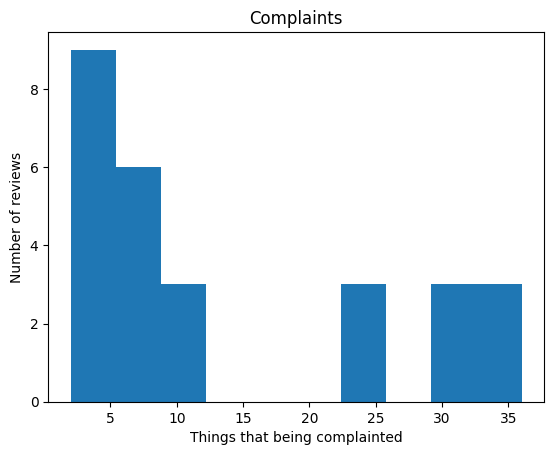

In [ ]:
#Make a box plot
plt.hist(complaint_things)
plt.title("Complaints")
plt.xlabel("Things that being complainted")
plt.ylabel('Number of reviews')

In [ ]:
thing1_verified = verified_status_BadNew[verified_status_BadNew['comment'].str.contains('seat', case=False)].count()
thing2_verified = verified_status_BadNew[verified_status_BadNew['comment'].str.contains('toilet', case=False)].count()
thing3_verified = verified_status_BadNew[verified_status_BadNew['comment'].str.contains('Delay', case=False)].count()
thing4_verified = verified_status_BadNew[verified_status_BadNew['comment'].str.contains('luggage', case=False)].count()
thing5_verified = verified_status_BadNew[verified_status_BadNew['comment'].str.contains('bag', case=False)].count()
thing6_verified = verified_status_BadNew[verified_status_BadNew['comment'].str.contains('flight', case=False)].count()
thing7_verified = verified_status_BadNew[verified_status_BadNew['comment'].str.contains('attendant', case=False)].count()
thing8_verified = verified_status_BadNew[verified_status_BadNew['comment'].str.contains('service', case=False)].count()
thing9_verified = verified_status_BadNew[verified_status_BadNew['comment'].str.contains('price', case=False)].count()

In [ ]:
complaint_things_verified = pd.concat([thing1_verified, thing2_verified, thing3_verified, thing4_verified, thing5_verified, thing6_verified, thing7_verified, thing8_verified, thing9_verified])

In [ ]:
complaint_things_verified

id         24
status     24
comment    24
id          2
status      2
comment     2
id          7
status      7
comment     7
id          6
status      6
comment     6
id          7
status      7
comment     7
id         30
status     30
comment    30
id          2
status      2
comment     2
id         21
status     21
comment    21
id          4
status      4
comment     4
dtype: int64

In [ ]:
thing1_Notverified = not_verified_status_BadNew[not_verified_status_BadNew['comment'].str.contains('seat', case=False)].count()
thing2_Notverified = not_verified_status_BadNew[not_verified_status_BadNew['comment'].str.contains('toilet', case=False)].count()
thing3_Notverified = not_verified_status_BadNew[not_verified_status_BadNew['comment'].str.contains('Delay', case=False)].count()
thing4_Notverified = not_verified_status_BadNew[not_verified_status_BadNew['comment'].str.contains('luggage', case=False)].count()
thing5_Notverified = not_verified_status_BadNew[not_verified_status_BadNew['comment'].str.contains('bag', case=False)].count()
thing6_Notverified = not_verified_status_BadNew[not_verified_status_BadNew['comment'].str.contains('flight', case=False)].count()
thing7_Notverified = not_verified_status_BadNew[not_verified_status_BadNew['comment'].str.contains('attendant', case=False)].count()
thing8_Notverified = not_verified_status_BadNew[not_verified_status_BadNew['comment'].str.contains('service', case=False)].count()
thing9_Notverified = not_verified_status_BadNew[not_verified_status_BadNew['comment'].str.contains('price', case=False)].count()

In [ ]:
complaint_things_Notverified = pd.concat([thing1_Notverified, thing2_Notverified, thing3_Notverified,thing4_Notverified,thing5_Notverified,thing6_Notverified,thing7_Notverified,thing8_Notverified,thing9_Notverified])

In [ ]:
complaint_things_Notverified

id         6
status     6
comment    6
id         1
status     1
comment    1
id         1
status     1
comment    1
id         2
status     2
comment    2
id         2
status     2
comment    2
id         6
status     6
comment    6
id         0
status     0
comment    0
id         3
status     3
comment    3
id         0
status     0
comment    0
dtype: int64

According to good reviews

In [ ]:
select = ['id', 'status', 'comment']
filter_df1_british= filter_df1_british[select]
filter_df1_british

,id,status,comment
0,0,Not Verified,Booked a very special holiday for me and my ...
2,2,✅ Trip Verified,BA standards continue to decline every time ...
3,3,Not Verified,Awful. Business class check in queue just as...
5,5,✅ Trip Verified,I take comfort in reading the last ten or so...
10,10,✅ Trip Verified,"I had a flight from Miami, Florida to Dublin,..."
...,...,...,...
972,972,✅ Trip Verified,Boston to London. World Traveler seats. Nice...
973,973,✅ Trip Verified,London to Athens. We were fortunate to get e...
974,974,✅ Trip Verified,London to Johannesburg. So impressed by the ...
976,976,✅ Trip Verified,London to Berlin scheduled for 21st December...


Good reviews

In [ ]:
# count = 0
# good_df1_British1 = filter_df1_british[filter_df1_british['comment'].str.contains('love', case = False)]
# # thing1_df_British1 = ~filter_df1_british[filter_df1_british['comment'].str.contains('disappointed')]
# good_df1_British1

In [ ]:
bad1_filter_df1_british = filter_df1_british[filter_df1_british['comment'].str.contains("disappointed", case=False)]
bad2_filter_df1_british =  filter_df1_british[filter_df1_british['comment'].str.contains('incredibly disappointed', case=False)]
bad3_filter_df1_british =  filter_df1_british[filter_df1_british['comment'].str.contains('awful', case=False)]
bad4_filter_df1_british =  filter_df1_british[filter_df1_british['comment'].str.contains('terrible', case=False)]

bad_things = pd.concat([bad1_filter_df1_british, bad2_filter_df1_british, bad3_filter_df1_british,bad4_filter_df1_british])

In [ ]:
bad_things

,id,status,comment
131,131,Not Verified,I travelled with British Airways from Sweden ...
447,447,✅ Trip Verified,Extremely disappointed In trip experience. I...
495,495,✅ Trip Verified,Me and my 1 year 11 months baby girl flew bu...
542,542,✅ Trip Verified,I booked a trip to Spain for mid-March 2020 ...
544,544,Not Verified,I booked my honeymoon flight from San Diego ...
615,615,✅ Trip Verified,Gatwick to Tirana. I was incredibly disappoi...
675,675,✅ Trip Verified,London to Belfast. British Airways bullied my...
775,775,Not Verified,London to Faro. We booked our tickets (famil...
795,795,✅ Trip Verified,Seems like no one was aware of my existence o...
858,858,✅ Trip Verified,I paid an extra £500 for two Premium economy...


In [ ]:
good_reviews1 = filter_df1_british[~filter_df1_british['comment'].str.contains('disappointed', case = False)]
# good_reviews2 = filter_df1_british[~filter_df1_british['comment'].str.contains('awful', case = False)]
# good_reviews3 = filter_df1_british[~filter_df1_british['comment'].str.contains('terrible', case = False)]

In [ ]:
# good_reviews = pd.concat([good_reviews1, good_reviews2, good_reviews3])

In [ ]:
good_reviews1

,id,status,comment
0,0,Not Verified,Booked a very special holiday for me and my ...
2,2,✅ Trip Verified,BA standards continue to decline every time ...
3,3,Not Verified,Awful. Business class check in queue just as...
5,5,✅ Trip Verified,I take comfort in reading the last ten or so...
10,10,✅ Trip Verified,"I had a flight from Miami, Florida to Dublin,..."
...,...,...,...
972,972,✅ Trip Verified,Boston to London. World Traveler seats. Nice...
973,973,✅ Trip Verified,London to Athens. We were fortunate to get e...
974,974,✅ Trip Verified,London to Johannesburg. So impressed by the ...
976,976,✅ Trip Verified,London to Berlin scheduled for 21st December...


Mostly talk about

In [ ]:
thing1 = filter_df1_british[filter_df1_british['comment'].str.contains('seat', case=False)].count()
thing2 = filter_df1_british[filter_df1_british['comment'].str.contains('toilet', case=False)].count()
thing3 = filter_df1_british[filter_df1_british['comment'].str.contains('Delay', case=False)].count()
thing4 = filter_df1_british[filter_df1_british['comment'].str.contains('luggage', case=False)].count()
thing5 = filter_df1_british[filter_df1_british['comment'].str.contains('bag', case=False)].count()
thing6 = filter_df1_british[filter_df1_british['comment'].str.contains('flight', case=False)].count()
thing7 = filter_df1_british[filter_df1_british['comment'].str.contains('attendant', case=False)].count()
thing8 = filter_df1_british[filter_df1_british['comment'].str.contains('service', case=False)].count()
thing9 = filter_df1_british[filter_df1_british['comment'].str.contains('price', case=False)].count()
thing10 = filter_df1_british[filter_df1_british['comment'].str.contains('crew', case=False)].count()
thing11 = filter_df1_british[filter_df1_british['comment'].str.contains('food', case=False)].count()
thing12 = filter_df1_british[filter_df1_british['comment'].str.contains('time', case=False)].count()
thing13 = filter_df1_british[filter_df1_british['comment'].str.contains('windows', case=False)].count()
thing14 = filter_df1_british[filter_df1_british['comment'].str.contains('noise', case=False)].count()
things = pd.concat([thing1, thing2, thing4, thing5,thing6,thing7,thing8,thing9,thing10,thing11,thing12,thing13])



In [ ]:
bad1_filter_df1_british = filter_df1_british[filter_df1_british['comment'].str.contains("disappointed", case=False)].count()
bad2_filter_df1_british = filter_df1_british[filter_df1_british['comment'].str.contains("horrible", case=False)].count()
bad3_filter_df1_british =  filter_df1_british[filter_df1_british['comment'].str.contains('awful', case=False)].count()
bad4_filter_df1_british =  filter_df1_british[filter_df1_british['comment'].str.contains('terrible', case=False)].count()
bad5_filter_df1_british = filter_df1_british[filter_df1_british['comment'].str.contains("bad", case=False)].count()
bad6_filter_df1_british = filter_df1_british[filter_df1_british['comment'].str.contains("suck", case=False)].count()
bad7_filter_df1_british = filter_df1_british[filter_df1_british['comment'].str.contains("pity", case=False)].count()
 
bad8_filter_df1_british = filter_df1_british[filter_df1_british['comment'].str.contains("frustrated", case=False)].count()

bad9_filter_df1_british = filter_df1_british[filter_df1_british['comment'].str.contains("disappointing", case=False)].count()



bad_comment_british = pd.concat([bad1_filter_df1_british, bad2_filter_df1_british, bad3_filter_df1_british, bad4_filter_df1_british,bad5_filter_df1_british, bad6_filter_df1_british,bad7_filter_df1_british,bad8_filter_df1_british, bad9_filter_df1_british], axis = 0)
bad_comment_british

id         10
status     10
comment    10
id         15
status     15
comment    15
id         13
status     13
comment    13
id         23
status     23
comment    23
id         31
status     31
comment    31
id          2
status      2
comment     2
id          1
status      1
comment     1
id          6
status      6
comment     6
id          5
status      5
comment     5
dtype: int64

In [ ]:
bad1_filter_df1_british = filter_df1_british[filter_df1_british['comment'].str.contains("disappointed", case=False)]
bad2_filter_df1_british = filter_df1_british[filter_df1_british['comment'].str.contains("horrible", case=False)]
bad3_filter_df1_british =  filter_df1_british[filter_df1_british['comment'].str.contains('awful', case=False)]
bad4_filter_df1_british =  filter_df1_british[filter_df1_british['comment'].str.contains('terrible', case=False)]
bad5_filter_df1_british = filter_df1_british[filter_df1_british['comment'].str.contains("bad", case=False)]
bad6_filter_df1_british = filter_df1_british[filter_df1_british['comment'].str.contains("suck", case=False)]
bad7_filter_df1_british = filter_df1_british[filter_df1_british['comment'].str.contains("pity", case=False)]
 
bad8_filter_df1_british = filter_df1_british[filter_df1_british['comment'].str.contains("frustrated", case=False)]

bad9_filter_df1_british = filter_df1_british[filter_df1_british['comment'].str.contains("disappointing", case=False)]



bad_comment_british = pd.concat([bad1_filter_df1_british, bad2_filter_df1_british, bad3_filter_df1_british, bad4_filter_df1_british,bad5_filter_df1_british, bad6_filter_df1_british,bad7_filter_df1_british,bad8_filter_df1_british, bad9_filter_df1_british], axis = 0)
bad_comment_british

,id,status,comment
131,131,Not Verified,I travelled with British Airways from Sweden ...
447,447,✅ Trip Verified,Extremely disappointed In trip experience. I...
495,495,✅ Trip Verified,Me and my 1 year 11 months baby girl flew bu...
542,542,✅ Trip Verified,I booked a trip to Spain for mid-March 2020 ...
544,544,Not Verified,I booked my honeymoon flight from San Diego ...
...,...,...,...
15,15,Not Verified,We will never fly British Airways again. Our...
101,101,✅ Trip Verified,My husband and I booked seats within our prem...
152,152,✅ Trip Verified,Lost 3 out of 4 checked bags. Denied wheelcha...
650,650,✅ Trip Verified,Brussels to Bangkok via London. Club World f...


In [ ]:
verified_badViews = bad_comment_british[bad_comment_british['status'].str.contains("Trip Verified", case = False)];
verified_badViews

,id,status,comment
447,447,✅ Trip Verified,Extremely disappointed In trip experience. I...
495,495,✅ Trip Verified,Me and my 1 year 11 months baby girl flew bu...
542,542,✅ Trip Verified,I booked a trip to Spain for mid-March 2020 ...
615,615,✅ Trip Verified,Gatwick to Tirana. I was incredibly disappoi...
675,675,✅ Trip Verified,London to Belfast. British Airways bullied my...
...,...,...,...
676,676,✅ Trip Verified,London to Cape Town. We had booked business ...
101,101,✅ Trip Verified,My husband and I booked seats within our prem...
152,152,✅ Trip Verified,Lost 3 out of 4 checked bags. Denied wheelcha...
650,650,✅ Trip Verified,Brussels to Bangkok via London. Club World f...
